In [4]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Settings

In [5]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Read data

In [7]:
data_dir='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/ISAS20_ARGO/NC/'

filesT = []
filesS = []
for iy in range(2002,2021):
    for im in range(1,13):
        filesT.append(data_dir+"%04d/"%(iy)+"ISAS20_ARGO_%04d%02d15_fld_TEMP.nc"%(iy,im))
        filesS.append(data_dir+"%04d/"%(iy)+"ISAS20_ARGO_%04d%02d15_fld_PSAL.nc"%(iy,im))

In [14]:
dataT = xr.open_mfdataset(filesT)
dataS = xr.open_mfdataset(filesS)

In [15]:
ISAS = dataT.drop_vars("TEMP_ERR").drop_vars("TEMP_PCTVAR").rename_vars(name_dict={'TEMP':'temperature'}).assign(salinity=dataS.PSAL)
ISAS = ISAS.rename_vars(name_dict={'longitude':'lon'}).rename_vars(name_dict={'latitude':'lat'})

In [16]:
data =  ISAS.rename({'longitude': 'lon','latitude': 'lat'})

/var/folders/tj/cj2twzcd30jbzn574lsp6phw0000gn/T/ipykernel_73545/2143640843.py:1: UserWarning: rename 'longitude' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data =  ISAS.rename({'longitude': 'lon','latitude': 'lat'})
/var/folders/tj/cj2twzcd30jbzn574lsp6phw0000gn/T/ipykernel_73545/2143640843.py:1: UserWarning: rename 'latitude' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data =  ISAS.rename({'longitude': 'lon','latitude': 'lat'})


In [18]:
data

<xarray.Dataset> Size: 268GB
Dimensions:      (lon: 720, lat: 545, depth: 187, time: 228)
Coordinates:
  * lon          (lon) float32 3kB -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * lat          (lat) float32 2kB -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
  * depth        (depth) float32 748B 1.0 3.0 5.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time         (time) datetime64[ns] 2kB 2002-01-15 2002-02-15 ... 2020-12-15
Data variables:
    temperature  (time, depth, lat, lon) float64 134GB dask.array<chunksize=(1, 187, 545, 720), meta=np.ndarray>
    salinity     (time, depth, lat, lon) float64 134GB dask.array<chunksize=(1, 187, 545, 720), meta=np.ndarray>
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T111131L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2002-01-15
    stop_date:              2002-01-15
    creation_date:          20210706T111131L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

In [19]:
loni=-70
lonf=-23

## Extract data

In [20]:
data24N = data.interp(lat=[24.5], method="nearest").interp(lon=np.arange(loni,lonf,0.5), method="nearest").squeeze('lat').drop_vars('lat')

In [25]:
data24N_2000 = data24N.interp(depth = np.arange(10,1900,10), method="nearest")

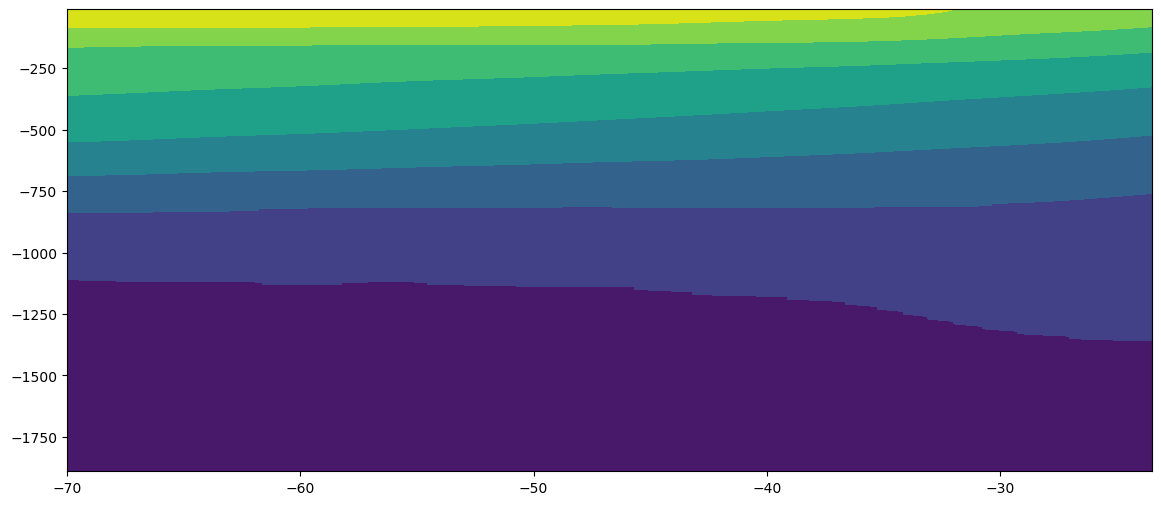

In [27]:
ig, ax = plt.subplots(figsize = (14,6))
ax.contourf(data24N_2000.temperature.lon,-data24N_2000.temperature.depth,data24N_2000.temperature.mean('time'))

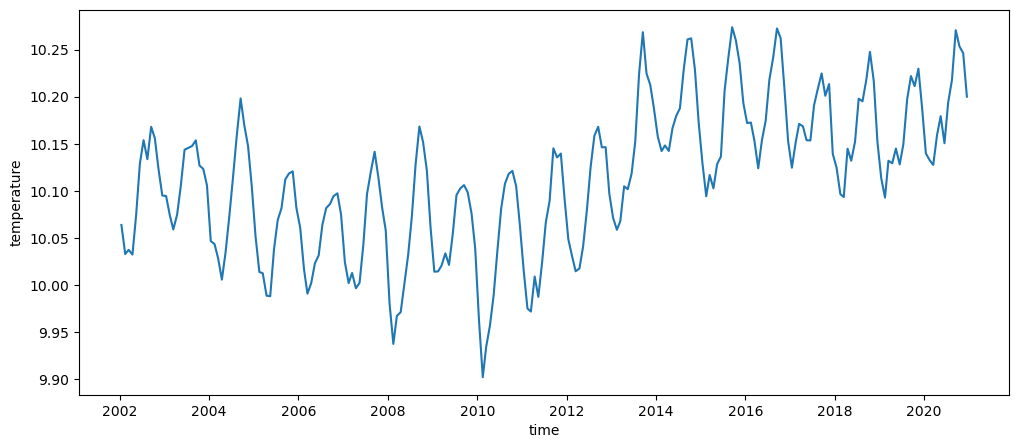

In [29]:
data24N_2000.temperature.mean('depth').mean('lon').plot()

In [30]:
data24N.to_netcdf('./Data/ISAS20_interp_24N.nc')